In [106]:
%matplotlib notebook #to show animation
import gymnasium as gym

In [107]:
#creating the environment
env = gym.make("CartPole-v1",render_mode='rgb_array')
#reseting the enironment
state, info = env.reset()

In [108]:
state

array([-0.01276679, -0.01684204, -0.00597527,  0.0147776 ], dtype=float32)

In [109]:
print(env.action_space)

Discrete(2)


In [110]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [76]:
#trying for one step
action = env.action_space.sample()
state, reward,done,truncated,info = env.step(action)
env.render()
env.close()
print(f"state:{state} done:{done} truncated: {truncated} info: {info}")

state:[ 0.00960264 -0.18528268 -0.01715638  0.31498885] done:False truncated: False info: {}


In [56]:
#testing 
import matplotlib.pyplot as plt 
done = False
while not done:
    #take a random action
    action = env.action_space.sample()
    state, reward,done,truncated,info = env.step(action)
    print(state)
    env.render()
env.close()

[ 0.03339487 -0.23333836 -0.02466336  0.27415022]
[ 0.0287281  -0.4280999  -0.01918035  0.5589534 ]
[ 0.0201661  -0.62294745 -0.00800128  0.84553224]
[ 0.00770715 -0.42771724  0.00890936  0.550344  ]
[-0.00084719 -0.23272155  0.01991624  0.2604814 ]
[-0.00550162 -0.42812207  0.02512587  0.55937904]
[-0.01406406 -0.23336163  0.03631345  0.2747168 ]
[-0.0187313  -0.0387761   0.04180779 -0.00629526]
[-0.01950682 -0.23447192  0.04168188  0.29927987]
[-0.02419626 -0.43016246  0.04766748  0.60481167]
[-0.0327995  -0.6259175   0.05976371  0.91211957]
[-0.04531785 -0.4316528   0.0780061   0.6388029 ]
[-0.05395091 -0.2377002   0.09078216  0.3716692 ]
[-0.05870492 -0.04397734  0.09821554  0.10893482]
[-0.05958446 -0.2403595   0.10039424  0.4309174 ]
[-0.06439165 -0.04679181  0.10901259  0.17149423]
[-0.06532749 -0.2432915   0.11244247  0.49648038]
[-0.07019332 -0.43980446  0.12237208  0.82237685]
[-0.07898941 -0.2465502   0.13881962  0.57055086]
[-0.08392041 -0.44331792  0.15023063  0.90354514]


 ## Implement the CartPole environment for a certain number of steps 

<IPython.core.display.Javascript object>


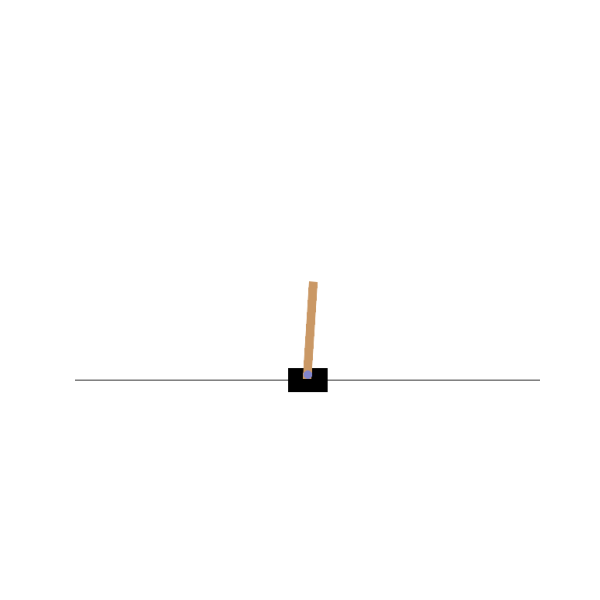

In [113]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#TRY-> the render using human mode and pop not this animation one
steps = 100
obs, info = env.reset()
done = False
truncated = False
Frames = []
cum_reward = 0
# Loop to get frames
for i in range(steps):
    while not done and not truncated:
        action = env.action_space.sample()
        state, reward, done, truncated, info = env.step(action)
        env_screen = env.render()
        cum_reward += reward
        Frames.append(env_screen)
env.close()

# Now animate the frames using matplotlib
fig = plt.figure(figsize=(6, 6))

# This function will update the plot with the current frame
def update_frame(frame_idx):
    plt.imshow(Frames[frame_idx])
    plt.axis('off')  # Hide axes
    return plt.gca().images

# Create the animation using FuncAnimation
ani = animation.FuncAnimation(fig, update_frame, frames=len(Frames), interval=50, blit=True)

# Display the animation
plt.show()


In [114]:
print(f"The reward for implementing using steps is {cum_reward}")

The reward for implementing using steps is 38.0


## Implement the CartPole environment for a certain number of episodes

In [112]:
Episodes = 20
episode_reward = []


for i in range(Episodes):
    obs,info = env.reset()#reset for every episode
    done = False
    truncated = False
    reward_for_episode = 0
    #run episode for steps
    while not done and not truncated:
        action = env.action_space.sample()
        state,reward,done,truncated,info = env.step(action)
        reward_for_episode += reward#cummulate for the episode
    
    #append final cumulative reward for the episode
    episode_reward.append(reward_for_episode)
    
#close once done
env.close()
print(f"the cummulative scores for 20 episodes are \n {episode_reward}")

the cummulative scores for 20 episodes are 
 [13.0, 9.0, 30.0, 46.0, 47.0, 28.0, 9.0, 28.0, 26.0, 14.0, 39.0, 16.0, 19.0, 18.0, 10.0, 13.0, 15.0, 12.0, 10.0, 10.0]


 ## Plot the cumulative reward of the games and note down the results.

In [98]:
Episodes = 20
episode_reward = []
steps_reward = []

for i in range(Episodes):
    obs,info = env.reset()#reset for every episode
    done = False
    truncated = False
    steps_reward.append([])#list for each episode
    reward_for_episode = 0
    #run episode for steps
    while not done and not truncated:
        action = env.action_space.sample()
        state,reward,done,truncated,info = env.step(action)
        reward_for_episode += reward#cummulate for the episode
        steps_reward[i].append(reward_for_episode)#append for the this step of the episdoe
    
    #append final cumulative reward for the episode
    episode_reward.append(reward_for_episode)
    
#close once done
env.close()

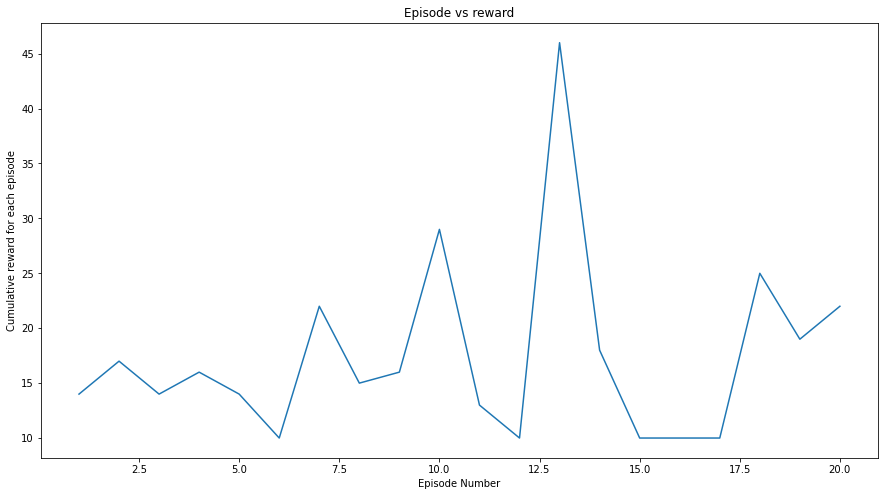

In [99]:
#plotting accross 20episodes the cum reward vs the episode
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
plt.plot(range(1,21),episode_reward)
plt.xlabel("Episode Number")
plt.ylabel("Cumulative reward for each episode")
plt.title("Episode vs reward")
plt.show()

In [100]:
steps_reward[0]

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]

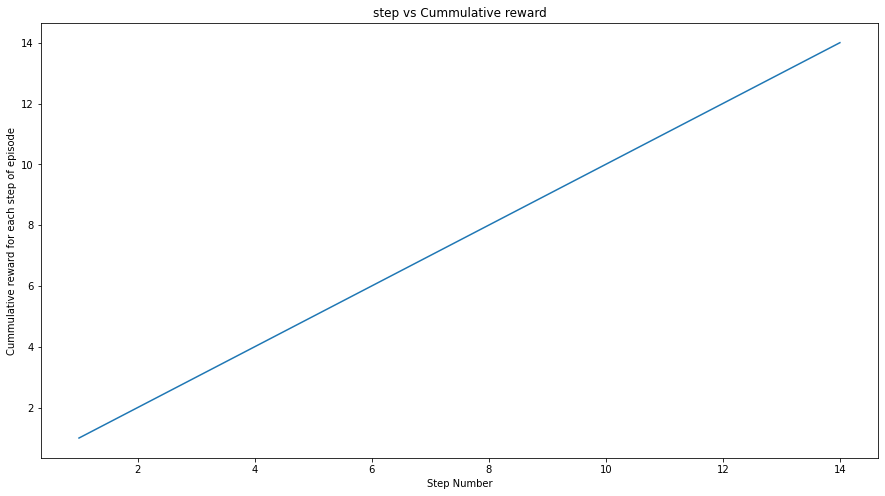

In [101]:
#plotting across steps the reward
#plotting across the first episode steps
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
plt.plot(range(1,len(steps_reward[0])+1),steps_reward[0])
plt.xlabel("Step Number")
plt.ylabel("Cummulative reward for each step of episode")
plt.title("step vs Cummulative reward")
plt.show()

## Compare and comment on the rewards earned for both approaches. 